# Test RGBA structural similarity (dssim) between Web GUIs

## Install dssim tool 

In [70]:
# For Linux

# git clone https://github.com/kornelski/dssim.git
# cd dssim
# make

## Import libraries

In [71]:
import cv2
import matplotlib.pyplot as plt
import subprocess

## Images paths 

In [72]:
# Set images paths
IMAGE_A_PATH = "data/img1_original.png"
IMAGE_B_PATH = "data/img1_modified_resized.png"
DIFFERENCE_IMAGE_PATH = "output/difference_image"

## Calculate dssim visual similarity and save difference image

In [73]:
# Build the command as a string
command = f"dssim -o {DIFFERENCE_IMAGE_PATH} {IMAGE_A_PATH} {IMAGE_B_PATH}"

# Execute the command
process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE)
stdout, _ = process.communicate()

dssim_index = stdout.decode("utf-8").split("\t")[0]

# Print dssim 
print(f"dssim_index: {float(dssim_index):.3f}")

dssim_index: 0.457


## Display processed images

In [74]:
# Load images
imageA = cv2.imread(IMAGE_A_PATH)
imageB = cv2.imread(IMAGE_B_PATH)
differenceImage = cv2.imread(DIFFERENCE_IMAGE_PATH + "-0.png")

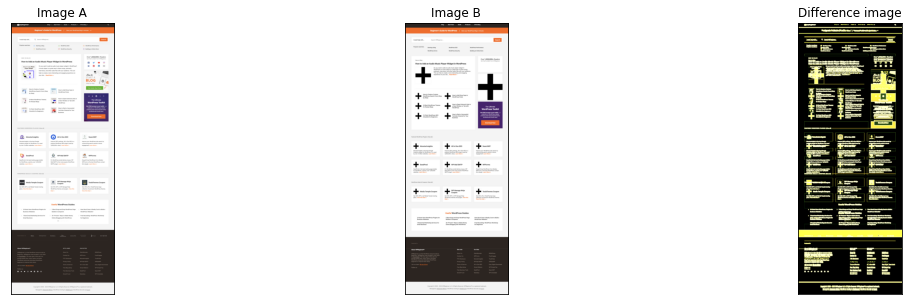

In [75]:
#3Display the images

# Show original images
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(cv2.cvtColor(imageA, cv2.COLOR_BGR2RGB))
axs[0].set_title('Image A')
axs[1].imshow(cv2.cvtColor(imageB, cv2.COLOR_BGR2RGB))
axs[1].set_title('Image B')

# Show difference image 
axs[2].imshow(cv2.cvtColor(differenceImage, cv2.COLOR_BGR2RGB))
axs[2].set_title('Difference image')

# Remove the x and y ticks
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()